## DT스쿨 스터디 자료
### 캐글 대회 처음 부터 끝까지 ~ 경험해 보자

#### 학습 목표

•	데이터 사이언스 관련 최대 커뮤니티인 캐글의 경진대회에 직접 참여해서 문제를 해결해본다.<br>
•	캐글에서 데이터를 내려받는 것으로부터 시작해서, 로컬 서버에서 자유롭게 다루어보며 문제 해결을 위한 고민을 해본다.<br>
•	앙상블 기법의 개념과 강점을 이해하고, 여러 모델의 예측 결과를 Averaging 한 최종 결과로 캐글에 제출해본다.<br>
•	하이퍼 파라미터 튜닝의 필요성과 의미를 이해해본다

### 1-1. 대회의 시작 (1) 참가 규칙, 평가 기준 살펴보기
 
캐글 파이썬 코스의 보너스 트랙으로 타이타닉 경진대회에 참가하는 것으로 진행됩니다.
지금까지 공부해오시는 동안 캐글에서 제공하는 데이터셋을 활용했던 적, 있으신가요?
오늘은 캐글에서 직접 대회를 경험해보는 것인 만큼, 가입을 아직 안 하셨다면 우선 캐글에 가입을 하고 시작하겠습니다.
아래 링크를 클릭해서 우리가 참가할 대회 페이지에 접속하겠습니다.

[타이타닉 경진대회 링크](https://www.kaggle.com/c/titanic)

캐글에는 아주 다양한 경진대회들이 있고, 각 경진대회들은 모두 대회 소개, 데이터셋 소개, 규칙 설명 등 대회에 참가하는 사람들을 위한 세부 내용들로 구성되어 있습니다.
당연히 대회별로 평가 방법과 규칙이 상이하니, 대회를 본격적으로 시작하기 전에 소개와 세부 내용을 잘 읽고 시작하는 것이 좋겠죠!

### 파일 다운로드
* train.csv
분석해야할 파일입니다. 예측 모델 생성에 사용됩니다.

* test.csv
예측해야할 탑승객 목록입니다. 생존여부(Survived) 칼럼이 없습니다.

* gender_submission.csv
성별만으로 생존여부를 예측한 샘플입니다. (여자: 생존, 남자: 사망)


### 일단 제출하고 시작해~!!!!
![Titanic - Machine Learning from Disaster _ Kaggle ](https://user-images.githubusercontent.com/76939885/126774967-b12abb49-872d-44e3-9e72-f42cefbdc5ea.png)

![Titanic](https://user-images.githubusercontent.com/76939885/126775339-3401e4b6-0891-427c-ac43-f5696216b17e.png)

In [9]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [ ]:
$ conda install -c conda-forge missingno
!pip install missingno

#### 2) 데이터

Survived - 생존 여부 (0 = 사망, 1 = 생존)<br>
Pclass - 티켓 클래스 (1 = 1등석, 2 = 2등석, 3 = 3등석)<br>
Sex - 성별<br>
Age - 나이<br>
SibSp - 함께 탑승한 자녀 / 배우자 의 수<br>
Parch - 함께 탑승한 부모님 / 아이들 의 수<br>
Ticket - 티켓 번호<br>
Fare - 탑승 요금<br>
Cabin - 수하물 번호<br>
Embarked - 선착장 (C = Cherbourg, Q = Queenstown, S = Southampton)<br>

In [2]:
os.chdir(r'C:\Users\sunny\Desktop\DT\titanic')
df_train  = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [3]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
df_train.shape

(891, 12)

In [6]:
df_test.shape

(418, 11)

## 결측치

* train의 칼럼별 결측치 합계
train.isnull().sum()

* test의 칼럼별 결측치 합계
test.isnull().sum()<br>
나이, 수화물 번호, 선착장, 탑승 요금 정보가 누락되어 있습니다.

In [7]:
#위의 columns를 for문으로
for col in df_train.columns:
    msg = 'column: {:>10}\t Percent of NaN value: {:.2f}%'.format(col, 100*(df_train[col].isnull().sum() / df_train[col].shape[0])) #format 오른쪽 정렬
    print(msg)

column: PassengerId	 Percent of NaN value: 0.00%
column:   Survived	 Percent of NaN value: 0.00%
column:     Pclass	 Percent of NaN value: 0.00%
column:       Name	 Percent of NaN value: 0.00%
column:        Sex	 Percent of NaN value: 0.00%
column:        Age	 Percent of NaN value: 19.87%
column:      SibSp	 Percent of NaN value: 0.00%
column:      Parch	 Percent of NaN value: 0.00%
column:     Ticket	 Percent of NaN value: 0.00%
column:       Fare	 Percent of NaN value: 0.00%
column:      Cabin	 Percent of NaN value: 77.10%
column:   Embarked	 Percent of NaN value: 0.22%


<AxesSubplot:>

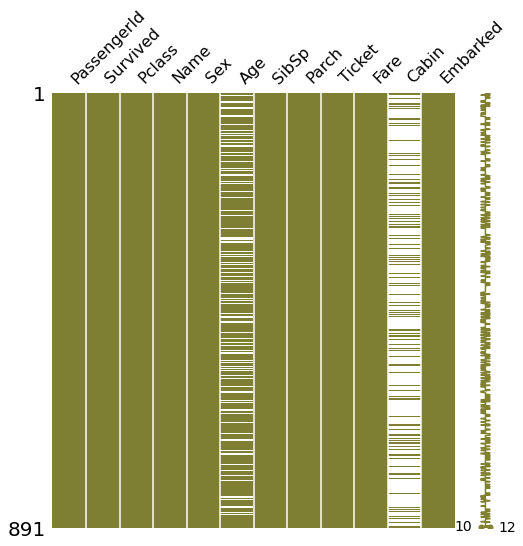

In [10]:
msno.matrix(df = df_train.iloc[:,:], figsize=(8,8), color = (0.5, 0.5, 0.2))
#null data의 분포(위치)

In [12]:
df_train['Age'].fillna(df_train['Age'].mean(),inplace=True)
df_train['Cabin'].fillna('N',inplace=True)
df_train['Embarked'].fillna('N',inplace=True)
print('데이터 세트 Null 값 갯수 ',df_train.isnull().sum().sum())

데이터 세트 Null 값 갯수  0


In [13]:
df_train['Cabin'] = df_train['Cabin'].str[:1]
print(df_train['Cabin'].head(3))

0    N
1    C
2    N
Name: Cabin, dtype: object


In [14]:
df_train.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

findfont: Font family ['NanumGothic'] not found. Falling back to DejaVu Sans.


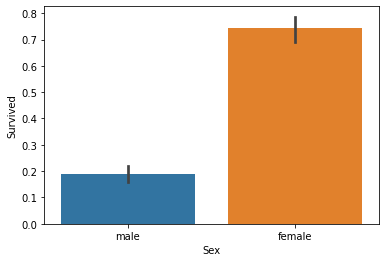

In [15]:
sns.barplot(x='Sex', y = 'Survived', data=df_train)

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

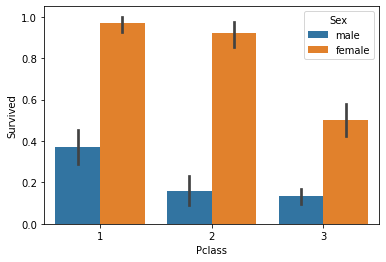

In [16]:
sns.barplot(x='Pclass', y='Survived', hue='Sex', data=df_train)

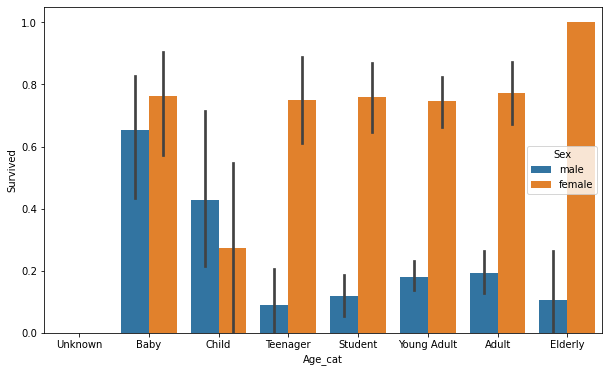

In [17]:
# 입력 age에 따라 구분값을 반환하는 함수 설정. DataFrame의 apply lambda식에 사용. 
def get_category(age):
    cat = ''
    if age <= -1: cat = 'Unknown'
    elif age <= 5: cat = 'Baby'
    elif age <= 12: cat = 'Child'
    elif age <= 18: cat = 'Teenager'
    elif age <= 25: cat = 'Student'
    elif age <= 35: cat = 'Young Adult'
    elif age <= 60: cat = 'Adult'
    else : cat = 'Elderly'
    
    return cat

# 막대그래프의 크기 figure를 더 크게 설정 
plt.figure(figsize=(10,6))

#X축의 값을 순차적으로 표시하기 위한 설정 
group_names = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Elderly']

# lambda 식에 위에서 생성한 get_category( ) 함수를 반환값으로 지정. 
# get_category(X)는 입력값으로 'Age' 컬럼값을 받아서 해당하는 cat 반환
df_train['Age_cat'] = df_train['Age'].apply(lambda x : get_category(x))
sns.barplot(x='Age_cat', y = 'Survived', hue='Sex', data=df_train, order=group_names)
df_train.drop('Age_cat', axis=1, inplace=True)

In [18]:
from sklearn import preprocessing

def encode_features(dataDF):
    features = ['Cabin', 'Sex', 'Embarked']
    for feature in features:
        le = preprocessing.LabelEncoder()
        le = le.fit(dataDF[feature])
        dataDF[feature] = le.transform(dataDF[feature])
        
    return dataDF

titanic_df = encode_features(df_train)
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,7,3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,2,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,7,3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2,3
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,7,3


In [19]:
from sklearn.preprocessing import LabelEncoder

# Null 처리 함수
def fillna(df):
    df['Age'].fillna(df['Age'].mean(),inplace=True)
    df['Cabin'].fillna('N',inplace=True)
    df['Embarked'].fillna('N',inplace=True)
    df['Fare'].fillna(0,inplace=True)
    return df

# 머신러닝 알고리즘에 불필요한 속성 제거
def drop_features(df):
    df.drop(['PassengerId','Name','Ticket'],axis=1,inplace=True)
    return df

# 레이블 인코딩 수행. 
def format_features(df):
    df['Cabin'] = df['Cabin'].str[:1]
    features = ['Cabin','Sex','Embarked']
    for feature in features:
        le = LabelEncoder()
        le = le.fit(df[feature])
        df[feature] = le.transform(df[feature])
    return df

# 앞에서 설정한 Data Preprocessing 함수 호출
def transform_features(df):
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    return df


In [21]:
# 원본 데이터를 재로딩 하고, feature데이터 셋과 Label 데이터 셋 추출. 
titanic_df = pd.read_csv('train.csv')
y_titanic_df = titanic_df['Survived']
X_titanic_df= titanic_df.drop('Survived',axis=1)

X_titanic_df = transform_features(X_titanic_df)

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X_titanic_df, y_titanic_df, \
                                                  test_size=0.2, random_state=11)

In [23]:
#from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
#from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# # 결정트리, Random Forest, 로지스틱 회귀를 위한 사이킷런 Classifier 클래스 생성
# dt_clf = DecisionTreeClassifier(random_state=11)
rf_clf = RandomForestClassifier(random_state=11)
# lr_clf = LogisticRegression()

# # DecisionTreeClassifier 학습/예측/평가
# dt_clf.fit(X_train , y_train)
# dt_pred = dt_clf.predict(X_test)
# print('DecisionTreeClassifier 정확도: {0:.4f}'.format(accuracy_score(y_test, dt_pred)))

# RandomForestClassifier 학습/예측/평가
rf_clf.fit(X_train , y_train)
rf_pred = rf_clf.predict(X_test)
print('RandomForestClassifier 정확도:{0:.4f}'.format(accuracy_score(y_test, rf_pred)))

# LogisticRegression 학습/예측/평가
# lr_clf.fit(X_train , y_train)
# lr_pred = lr_clf.predict(X_test)
# print('LogisticRegression 정확도: {0:.4f}'.format(accuracy_score(y_test, lr_pred)))

RandomForestClassifier 정확도:0.8547


In [25]:
'''
" 데이터의 수가 적은 경우에는 이 데이터 중의 일부인 검증 데이터의 수도 적기 때문에 검증 성능의 신뢰도가 떨어진다. 
그렇다고 검증 데이터의 수를 증가시키면 학습용 데이터의 수가 적어지므로 정상적인 학습이 되지 않는다.
이러한 딜레마를 해결하기 위한 검증 방법이 K-폴드(K-fold) 교차검증 방법이다. "
'''
from sklearn.model_selection import KFold

def exec_kfold(clf, folds=5):
    # 폴드 세트를 5개인 KFold객체를 생성, 폴드 수만큼 예측결과 저장을 위한  리스트 객체 생성.
    kfold = KFold(n_splits=folds)
    scores = []
    
    # KFold 교차 검증 수행. 
    for iter_count , (train_index, test_index) in enumerate(kfold.split(X_titanic_df)):
        # X_titanic_df 데이터에서 교차 검증별로 학습과 검증 데이터를 가리키는 index 생성
        X_train, X_test = X_titanic_df.values[train_index], X_titanic_df.values[test_index]
        y_train, y_test = y_titanic_df.values[train_index], y_titanic_df.values[test_index]
        
        # Classifier 학습, 예측, 정확도 계산 
        clf.fit(X_train, y_train) 
        predictions = clf.predict(X_test)
        accuracy = accuracy_score(y_test, predictions)
        scores.append(accuracy)
        print("교차 검증 {0} 정확도: {1:.4f}".format(iter_count, accuracy))     
    
    # 5개 fold에서의 평균 정확도 계산. 
    mean_score = np.mean(scores)
    print("평균 정확도: {0:.4f}".format(mean_score)) 
# exec_kfold 호출
exec_kfold(rf_clf , folds=5) 

교차 검증 0 정확도: 0.7933
교차 검증 1 정확도: 0.8090
교차 검증 2 정확도: 0.8371
교차 검증 3 정확도: 0.7753
교차 검증 4 정확도: 0.8596
평균 정확도: 0.8148


In [27]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(rf_clf, X_titanic_df , y_titanic_df , cv=5)
for iter_count,accuracy in enumerate(scores):
    print("교차 검증 {0} 정확도: {1:.4f}".format(iter_count, accuracy))

print("평균 정확도: {0:.4f}".format(np.mean(scores)))

교차 검증 0 정확도: 0.7933
교차 검증 1 정확도: 0.7978
교차 검증 2 정확도: 0.8483
교차 검증 3 정확도: 0.7640
교차 검증 4 정확도: 0.8652
평균 정확도: 0.8137


In [29]:
X_test

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
431,3,0,29.699118,1,0,16.1000,7,3
821,3,1,27.000000,0,0,8.6625,7,3
629,3,1,29.699118,0,0,7.7333,7,2
626,2,1,57.000000,0,0,12.3500,7,2
665,2,1,32.000000,2,0,73.5000,7,3
...,...,...,...,...,...,...,...,...
638,3,0,41.000000,0,5,39.6875,7,3
771,3,1,48.000000,0,0,7.8542,7,3
521,3,1,22.000000,0,0,7.8958,7,3
711,1,1,29.699118,0,0,26.5500,2,3


In [31]:
predict = rf_clf.predict(X_test)
result =pd.DataFrame({
    'PassengerId': X_test.index,
    'Survived': predict
})
result.to_csv('result.csv', index=False) 

In [37]:
result_df = pd.read_csv(r'C:\Users\sunny\Desktop\DT\titanic\gender_submission.csv')
result_df

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
